In [10]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from yolov5.yolov5 import YoloV5

YOLOv5 🚀 v6.1-11-g63ddb6f torch 1.10.2+cu102 CPU

Fusing layers... 


modelo yolo cargado


Model Summary: 369 layers, 20887482 parameters, 0 gradients, 48.1 GFLOPs


In [3]:
from yolov5.utils.image_loader import ImageLoader
import cv2

img = cv2.imread("/home/zaid/github/traffic-tracker/blob.png")
im, im0 = ImageLoader.PreprocessImage(img)

In [4]:
preds = YoloV5.get_bounding_boxes(im = im, im0s = im0)

In [5]:
bounding_boxes_list = []

for prediction in preds:
    x_start, y_start, x_end, y_end = preds[prediction]["bounding_box"].values()
    bounding_boxes_list.append([x_start, y_start, x_end, y_end])
    print(preds[prediction])

{'class': 0, 'bounding_box': {'x_start': 366, 'y_start': 971, 'x_end': 609, 'y_end': 1040}, 'confidence': 0.2592807412147522}
{'class': 2, 'bounding_box': {'x_start': 876, 'y_start': 434, 'x_end': 955, 'y_end': 482}, 'confidence': 0.3241974413394928}
{'class': 0, 'bounding_box': {'x_start': 872, 'y_start': 436, 'x_end': 961, 'y_end': 482}, 'confidence': 0.4416048526763916}
{'class': 0, 'bounding_box': {'x_start': 1120, 'y_start': 428, 'x_end': 1194, 'y_end': 462}, 'confidence': 0.4528098404407501}
{'class': 2, 'bounding_box': {'x_start': 904, 'y_start': 446, 'x_end': 1049, 'y_end': 508}, 'confidence': 0.5020219683647156}
{'class': 0, 'bounding_box': {'x_start': 459, 'y_start': 446, 'x_end': 576, 'y_end': 497}, 'confidence': 0.5771611332893372}
{'class': 0, 'bounding_box': {'x_start': 1107, 'y_start': 470, 'x_end': 1221, 'y_end': 547}, 'confidence': 0.5833899974822998}
{'class': 2, 'bounding_box': {'x_start': 547, 'y_start': 442, 'x_end': 664, 'y_end': 491}, 'confidence': 0.640137195587

In [6]:
for prediction in preds:
    if preds[prediction]["confidence"] > 0.5:
        x_start, y_start, x_end, y_end = preds[prediction]["bounding_box"].values()
        if preds[prediction]["class"] == 0:
            color = (0,255,0)
        elif preds[prediction]["class"] == 1:
            color = (255,0,0)
        elif preds[prediction]["class"] == 2:
            color = (0,0,255)
        elif preds[prediction]["class"] == 3:
            color = (0,255,255)
        elif preds[prediction]["class"] == 4:
            color = (255,255,0)
        cv2.rectangle(img, (x_start, y_start), (x_end, y_end), color, 4, -1)

In [7]:
print(img.shape)

(1040, 1920, 3)


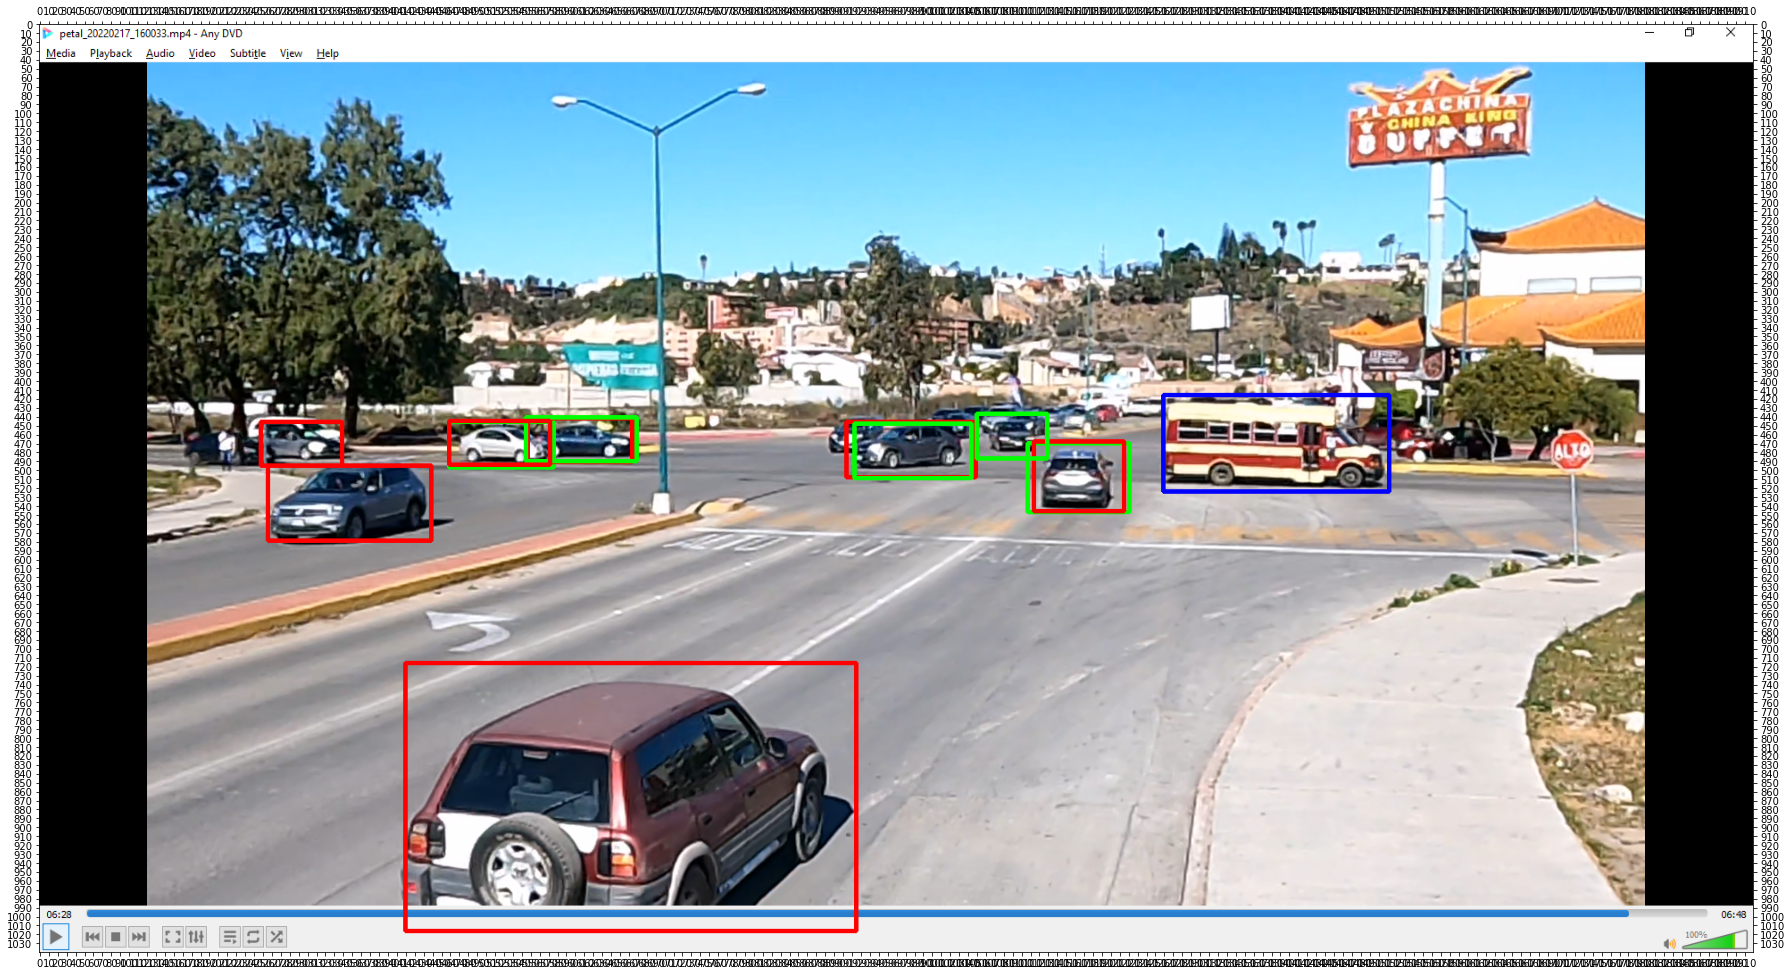

In [11]:
from helpers.plot import plot_image_huge

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_image_huge(img)